In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from tqdm import tqdm
from sklearn.model_selection import train_test_split

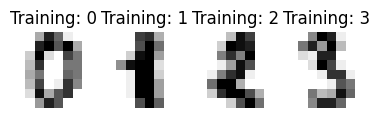

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(4.5, 6))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [ ]:
data = pd.DataFrame(data=digits.data, columns=digits.feature_names)
target = pd.DataFrame(data=digits.target, columns=["target"])

In [ ]:
def Sigmoid(x):
  return 1 / (1 + np.exp(-x))

def Sigmoid_d(func):
  return func * (1 - func)

In [ ]:
def W(input, hidden, output):
  np.random.seed(42)
  limit1 = np.sqrt(6 / (input + hidden))
  w1 = np.random.uniform(-limit1, limit1, (hidden, input))

  limit2 = np.sqrt(6 / (hidden + hidden))
  w2 = np.random.uniform(-limit2, limit2, (hidden, hidden))

  limit3 = np.sqrt(6 / (hidden + output))
  w3 = np.random.uniform(-limit3, limit3, (output, hidden))

  print("shape w1: ", w1.shape, "\n", "shape w2: ", w2.shape, "\n", "shape w3: ", w3.shape)
  return w1, w2, w3

In [ ]:
def forward(X, w1, w2, w3):
  l1 = w1 @ X
  z1 = Sigmoid(l1)
  l2 = w2 @ z1
  z2 = Sigmoid(l2)
  l3 = w3 @ z2
  out = Sigmoid(l3)

  dat = (z1, z2, out)
  return dat

In [ ]:
def predict(X, w1, w2, w3, threshold=0.5):
  l1 = w1 @ X
  z1 = Sigmoid(l1)
  l2 = w2 @ z1
  z2 = Sigmoid(l2)
  l3 = w3 @ z2
  out = Sigmoid(l3)
  return (out > threshold).astype(int)

In [ ]:
def predict_dataset(X, w1, w2, w3, threshold=0.5):
  p = []
  x = X.values.tolist()
  for i in range(X.shape[0]):
      pred = predict(np.array(x[i]), w1, w2, w3, threshold)
      pred=np.where(pred==1)[0].tolist()
      if pred == []:
          pred= 0
      else:
          pred = pred[0]

      p.append(pred)
  return p

In [ ]:
def one_hot(label, num_classes=10):
  vec = np.zeros(num_classes)
  vec[label] = 1
  return vec

In [ ]:
def back(data, w1, w2, w3, dat, target, lr):
  z1, z2, out = dat
  z1 = np.expand_dims(z1, axis=1)

  target_one_hot = one_hot(target, out.shape[0])
  delta3 = (out - target_one_hot) * Sigmoid_d(out)
  delta3 = np.expand_dims(delta3, axis=1)
  data = np.expand_dims(data, axis=1)
  z2 = np.expand_dims(z2, axis=1)
  w3 -= lr * (delta3 @ z2.T)

  delta2 = (w3.T @ delta3) * Sigmoid_d(z2)
  w2 -= lr * (delta2 @ z1.T)

  delta1 = (w2.T @ delta2) * Sigmoid_d(z1)
  w1 -= lr * (delta1 @ data.T)

  return w1, w2, w3

In [ ]:
def marks(y_true, y_pred, val="accuracy"):
  from sklearn.metrics import accuracy_score
  return accuracy_score(y_pred, y_true)

In [ ]:
def train(x_train,y_train,lr,epoh):
  w1, w2, w3 = W(x_train.shape[1],128,10)

  for i in tqdm(range(epoh)):
      for _ in range(x_train.shape[0]):
          indx = np.random.randint(0, x_train.shape[0])

          dat = forward(x_train.values[indx], w1, w2, w3)

          pred = predict(x_train.values[indx], w1, w2, w3)

          w1, w2, w3 = back(x_train.values[indx], w1, w2, w3, dat, y_train.values[indx], 0.01)

  return w1, w2, w3

In [ ]:
x_train, x_test, y_train ,y_test = train_test_split(data, target, test_size=.2, random_state = 42)

In [ ]:
w1, w2, w3 = train(x_train, y_train, 0.01, 30)

shape w1:  (128, 64) 
 shape w2:  (128, 128) 
 shape w3:  (10, 128)


100%|██████████| 30/30 [00:21<00:00,  1.40it/s]


In [ ]:
y_pred = predict_dataset(x_test, w1, w2, w3)

In [ ]:
marks(y_test,y_pred)

0.9583333333333334